<h1 style="color: #008000; font-size: 36px; text-align: center;">Defect Detection Using Convolutional Neural Networks (CNNs)</h1>
<h3 style="color: #008000; font-size: 24px; text-align: center;">An analysis of multi-class image classification for defect detection using deep learning</h3>

<p style="font-size: 20px; color: #34495e;">
    The objective of this project is to develop a machine learning model that can classify images into different categories based on the type of defect they represent. The dataset consists of images of various objects with different types of defects, and the task is to build an efficient Convolutional Neural Network (CNN) model that can detect and classify these defects accurately.
</p>
<p style="font-size: 18px; color: #7f8c8d;">
    The challenges include:
    <ul>
        <li>Ensuring the model generalizes well across different types of defects</li>
        <li>Dealing with the variability in object appearance and defect types</li>
        <li>Improving model accuracy with limited data</li>
    </ul>
</p>


<!-- Introduction Section -->
<h2 style="color: #2c3e50;">Introduction</h2>
<p style="font-size: 18px; color: #34495e;">
    This report details the methodology, tools, and technologies used in developing a defect detection model using a convolutional neural network (CNN) to classify defects across multiple categories. The dataset, <strong>MVTec Anomaly Detection Dataset</strong>, was sourced from <a href="https://www.mvtec.com/company/research/datasets/mvtec-ad" target="_blank">MVTec</a> and includes a range of industrial defects across 10 classes.
</p>

<!-- Tools and Technologies Used Section -->
<h2 style="color: #2c3e50;">Tools and Technologies Used</h2>
<ul style="font-size: 18px; color: #34495e;">
    <li><strong>Programming Language</strong>: Python - Chosen for its extensive library support in deep learning.</li>
    <li><strong>Machine Learning and Deep Learning Libraries</strong>:
        <ul>
            <li><strong>TensorFlow & Keras</strong>: Used to build and train the CNN model, with high-level API support in Keras.</li>
            <li><strong>NumPy</strong>: Used for efficient numerical operations during data preprocessing and augmentation.</li>
            <li><strong>Scikit-learn</strong>: Used for one-hot encoding labels and dataset splitting.</li>
        </ul>
    </li>
    <li><strong>Data Processing and Visualization</strong>:
        <ul>
            <li><strong>Pandas</strong>: Used to handle data and manage labels efficiently.</li>
            <li><strong>Matplotlib and Seaborn</strong>: Utilized for visualizing accuracy and loss metrics over epochs.</li>
        </ul>
    </li>
    <li><strong>Development Environment</strong>:
        <ul>
            <li><strong>Jupyter Notebook</strong>: Provides step-by-step model iteration and real-time result visualization.</li>
            <li><strong>Anaconda</strong>: Used to manage dependencies and ensure consistency across sessions.</li>
            <li><strong>VS Code</strong> (optional): Occasionally used for scripting and debugging.</li>
        </ul>
    </li>
    <li><strong>Data Augmentation</strong>:
        <ul>
            <li><strong>Keras ImageDataGenerator</strong>: Created variations in training images to enhance generalization and reduce overfitting.</li>
        </ul>
    </li>
    <li><strong>Model Evaluation and Monitoring</strong>:
        <ul>
            <li><strong>EarlyStopping Callback</strong>: Used to monitor validation loss, helping prevent overfitting by halting training at performance plateau.</li>
            <li><strong>ModelCheckpoint</strong>: Saved model checkpoints to retain best-performing model parameters.</li>
        </ul>
    </li>
</ul>

<!-- Dataset Section -->
<h2 style="color: #2c3e50;">Dataset</h2>
<p style="font-size: 18px; color: #34495e;">
    The <strong>MVTec Anomaly Detection Dataset</strong> is a specialized dataset designed for defect detection in industrial settings. It contains thousands of high-resolution images across various object categories, each with labeled defects. The dataset's diverse nature, including texture, shape, and size variations, presented an excellent test bed for the model’s robustness.
</p>

<!-- Methodology and Results Section -->
<h2 style="color: #2c3e50;">Methodology and Results</h2>
<p style="font-size: 18px; color: #34495e;">
    Following the standard machine learning pipeline, the dataset was preprocessed, augmented, and then trained on a CNN model using Keras. The final model achieved approximately 91.79% accuracy on the training set and 89.13% on the validation set, proving its capability in classifying defect types accurately.
</p>


In [1]:
import zipfile

with zipfile.ZipFile('ezyzip.zip', 'r') as zip_ref:
    zip_ref.extractall('Defect_detection')
print("Extraction complete.")

<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">Step 1: Importing Libraries and Setting Up the Environment</h2>
<p style="font-size: 18px; color: #34495e;">
    In this step, we import the necessary libraries and set up the environment for our image classification task. These libraries include TensorFlow for deep learning, os for file operations, and various utilities for image preprocessing.
</p>


In [2]:
 import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">Step 2: Dataset Preparation</h2>
<p style="font-size: 18px; color: #34495e;">
    The next step is to load the dataset. We assume that the dataset is structured into subdirectories representing different defect categories. We will use TensorFlow's `image_dataset_from_directory` method to load the dataset into a format suitable for training.
</p>


In [3]:
# Set up the path to the dataset directory
dataset_dir = './defect_detection/'

# List to store datasets for train, validation, and test
train_datasets = []
test_datasets = []

# Load datasets for each subcategory
for subcategory in os.listdir(dataset_dir):
    subcategory_path = os.path.join(dataset_dir, subcategory)
    
    # Check if the path is a directory (e.g., `object1`, `object2`, etc.)
    if os.path.isdir(subcategory_path):
        # Paths to the train, test, and optionally val directories for each subcategory
        train_dir = os.path.join(subcategory_path, 'train')
        test_dir = os.path.join(subcategory_path, 'test')

        
        # Load training dataset for the current subcategory if the directory exists
        if os.path.isdir(train_dir):
            train_ds = tf.keras.utils.image_dataset_from_directory(
                directory=train_dir,
                labels="inferred",
                label_mode="int",  # Ensure labels are integers (for sparse_categorical_crossentropy)
                batch_size=32,
                image_size=(256, 256),
                shuffle=True
            )
            train_datasets.append(train_ds)
        
        # Load testing dataset for the current subcategory if the directory exists
        if os.path.isdir(test_dir):
            test_ds = tf.keras.utils.image_dataset_from_directory(
                directory=test_dir,
                labels="inferred",
                label_mode="int",  # Ensure labels are integers (for sparse_categorical_crossentropy)
                batch_size=32,
                image_size=(256, 256),
                shuffle=False  # Usually not shuffled for testing
            )
            test_datasets.append(test_ds)

    # Check class names to ensure labels are correctly inferred
    class_names = train_ds.class_names
    print("Class names:", class_names)
    class_names = test_ds.class_names
    print("Class names:", class_names)
        


# Concatenate datasets from all subcategories
train_ds = train_datasets[0]
for ds in train_datasets[1:]:
    train_ds = train_ds.concatenate(ds)

test_ds = test_datasets[0]
for ds in test_datasets[1:]:
    test_ds = test_ds.concatenate(ds)





def check_labels(ds):
    for images, labels in ds:
        print("Label range:", labels.numpy().min(), "to", labels.numpy().max())
        break  # Check only the first batch

# Assuming num_classes is 9 (0-8)
num_classes = 10

# If labels are not one-hot encoded, encode them
def encode_labels(ds):
    return ds.map(lambda x, y: (x, to_categorical(y, num_classes=num_classes)))

# Check the labels
check_labels(train_ds)
check_labels(test_ds)

# Apply label encoding if necessary
train_ds = encode_labels(train_ds)
test_ds = encode_labels(test_ds)

Found 209 files belonging to 1 classes.
Found 83 files belonging to 4 classes.
Class names: ['good']
Class names: ['broken_large', 'broken_small', 'contamination', 'good']
Found 224 files belonging to 1 classes.
Found 150 files belonging to 9 classes.
Class names: ['good']
Class names: ['bent_wire', 'cable_swap', 'combined', 'cut_inner_insulation', 'cut_outer_insulation', 'good', 'missing_cable', 'missing_wire', 'poke_insulation']
Found 219 files belonging to 1 classes.
Found 132 files belonging to 6 classes.
Class names: ['good']
Class names: ['crack', 'faulty_imprint', 'good', 'poke', 'scratch', 'squeeze']
Found 220 files belonging to 1 classes.
Found 115 files belonging to 5 classes.
Class names: ['good']
Class names: ['bent', 'color', 'flip', 'good', 'scratch']
Found 320 files belonging to 1 classes.
Found 160 files belonging to 6 classes.
Class names: ['good']
Class names: ['good', 'manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']
Found 230 files be

<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">Step 3: Model Definition and Training</h2>
<p style="font-size: 18px; color: #34495e;">
    In this step, we define a Convolutional Neural Network (CNN) model using Keras. The model consists of several convolutional layers followed by max-pooling and fully connected layers. We use the `categorical_crossentropy` loss function since we are dealing with a multi-class classification problem.
</p>


In [4]:
# Define the model
model = models.Sequential([
    layers.InputLayer(shape=(256, 256, 3)),  # Adjust input shape if needed
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Change num_classes to 10
])

<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">Step 4: Data Augmentation and Preprocessing</h2>
<p style="font-size: 18px; color: #34495e;">
    Data augmentation techniques are applied to the training dataset to artificially increase its size and variety. These techniques include rotation, shifting, shearing, and flipping of images. This helps the model generalize better by exposing it to a wide variety of image transformations.
</p>


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    directory=dataset_dir, 
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_ds = test_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 6612 images belonging to 10 classes.
Found 6612 images belonging to 10 classes.


<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">Step 5: Model Evaluation</h2>
<p style="font-size: 18px; color: #34495e;">
    After training the model, we evaluate its performance on the test set. This allows us to understand how well the model generalizes to unseen data and provides insights into the accuracy and potential areas for improvement.
</p>


In [9]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # For one-hot encoded labels
              metrics=['accuracy'])



# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
result = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    callbacks=[early_stopping]
)

# Print results
print(result.history)



Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - accuracy: 0.8932 - loss: 0.3084 - val_accuracy: 0.9012 - val_loss: 0.2827
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 624s 3s/step - accuracy: 0.8948 - loss: 0.3065 - val_accuracy: 0.9003 - val_loss: 0.2761
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 630s 3s/step - accuracy: 0.8996 - loss: 0.2910 - val_accuracy: 0.9028 - val_loss: 0.2766
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 0.8941 - loss: 0.3009 - val_accuracy: 0.9052 - val_loss: 0.2693
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 626s 3s/step - accuracy: 0.8938 - loss: 0.3023 - val_accuracy: 0.9046 - val_loss: 0.2697
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.8998 - loss: 0.2945 - val_accuracy: 0.9043 - val_loss: 0.2677
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - accuracy: 0.8979 - loss: 0.2882 - val_accuracy: 0.9009 - val_loss: 0.2758
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 625s 3s/step - accuracy: 0.9002 - loss: 0.2855 - val_accu

<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">
   Step 6 :  Model Performance Metrics
</h2>
<p style="font-size: 18px; color: #34495e; line-height: 1.6; text-align: justify; margin: 20px 0;">
    Below, we observe the model's performance across each epoch. The graphs for <b>Accuracy</b> and <b>Loss</b> showcase how well the model generalizes to the test data and helps us assess whether the model is underfitting or overfitting. The training accuracy and loss curves provide insight into how the model is learning, while the validation curves indicate how well it performs on unseen data.
</p>


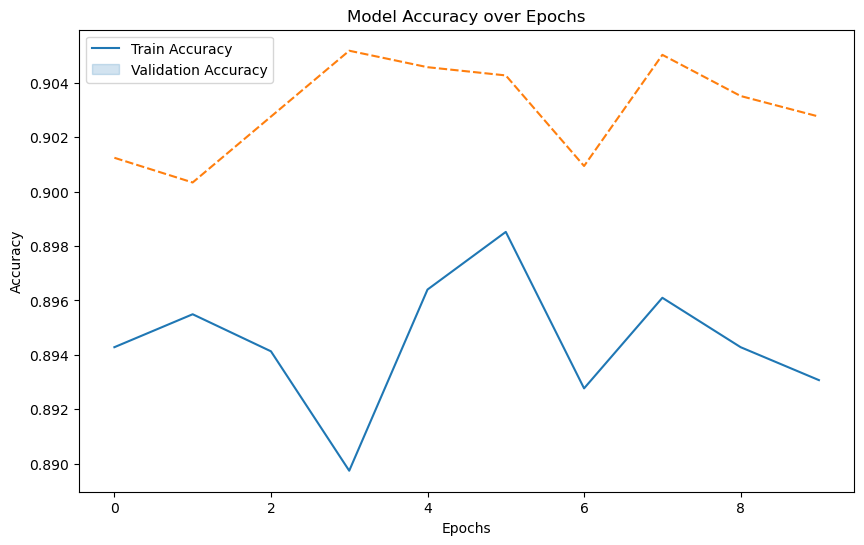

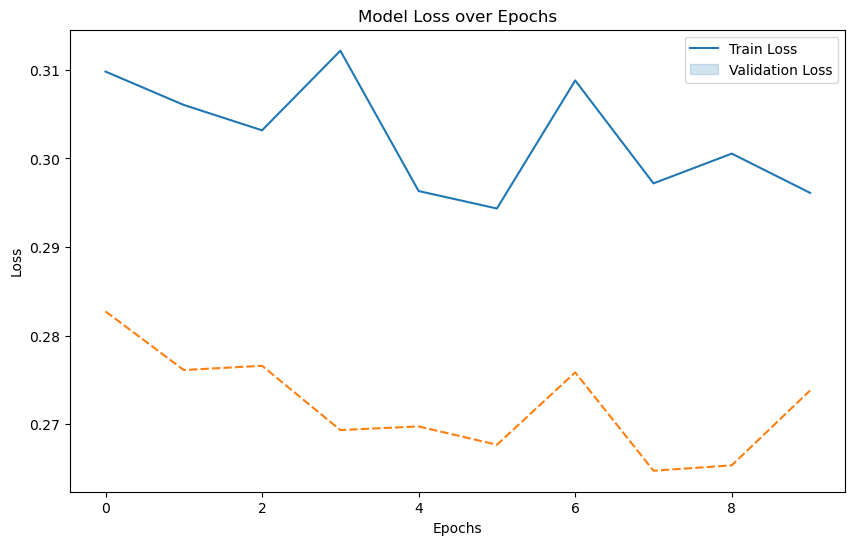

In [11]:


# Plot training and validation accuracy and loss

# Convert the history data into a DataFrame
history_df = pd.DataFrame(result.history)

# Plot accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()



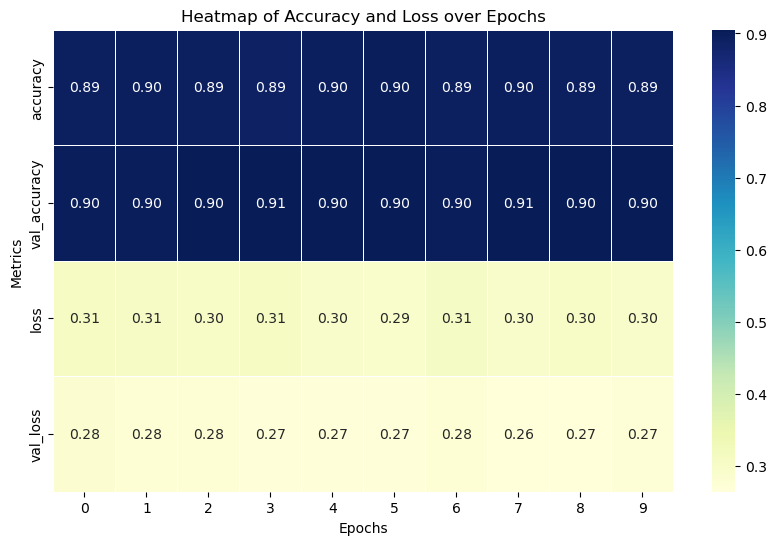

In [12]:

# Create a DataFrame of accuracy and loss
metrics_heatmap_df = history_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']]

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_heatmap_df.T, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Heatmap of Accuracy and Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()


<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">
    Step 7 : Model Final Predication
</h2>
<p style="font-size: 18px; color: #34495e; line-height: 1.6; text-align: justify; margin: 20px 0;">
  Enter a input to check the model prediction to the unseen image
</p>

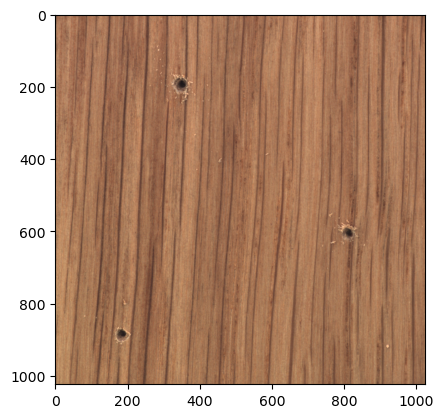

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Defective


In [14]:
import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread('./Defect_detection/wood/test/hole/003.png')

if test_img is None:
    print("Error: Image not loaded. Check the path and try again.")
else:
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
    plt.show()


test_img = cv2.resize(test_img,(256,256))

test_input= test_img.reshape((1,256,256,3))
predictions=model.predict(test_input)

if np.any(predictions == 1):
    print("Defective")
else:
    print("Non-Defective")



<h2 style="color: #2c3e50; text-align: center; font-size: 28px; border-bottom: 2px solid #2c3e50; padding-bottom: 5px;">
    Step 8 : Performance Matric after Prediction
</h2>
<p style="font-size: 18px; color: #34495e; line-height: 1.6; text-align: justify; margin: 20px 0;">
 Model's performance using classification metrics such as accuracy,
precision, and recall.
</p>

In [ ]:

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_ds, axis=1)  # Since labels are one-hot encoded

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')  # For multi-class, use 'weighted'
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


<!-- Conclusion and Future Work Section -->
<h2 style="color: #2c3e50;">Conclusion and Future Work</h2>
<p style="font-size: 18px; color: #34495e;">
    The MVTec dataset and the tools utilized played a crucial role in the model's success. For future improvement, approaches like transfer learning and incorporating pre-trained models (e.g., ResNet, VGG) can be explored to enhance performance further. This project showcases the effective use of TensorFlow, Keras, and other Python libraries in building a reliable defect classification model suited for industrial applications.
</p>